In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers


In [ ]:
imdb=keras.datasets.imdb
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=10000)

In [ ]:
imdb

<module 'keras.api.datasets.imdb' from '/usr/local/lib/python3.11/dist-packages/keras/api/datasets/imdb/__init__.py'>

In [ ]:
def vectorize(seq,dimension=10000):
  results=np.zeros((len(seq),dimension))
  for i,seq in enumerate(seq):
    results[i,seq]=1
  return results

x_train=vectorize(x_train)

x_test=vectorize(x_test)

In [ ]:
x_train.shape

(25000, 10000)

In [ ]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()


In [ ]:
from tensorflow.keras import optimizers, losses, metrics

model.add(Dense(16,activation='relu',input_shape=(10000,),name='input'))
model.add(Dense(16,activation='relu',name='layer1'))
model.add(Dense(1,activation='sigmoid',name='output'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

In [ ]:
history=model.fit(x_train,y_train,epochs=20,batch_size=512,validation_data=(x_test,y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - binary_accuracy: 0.7440 - loss: 0.5345 - val_binary_accuracy: 0.8811 - val_loss: 0.3265
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - binary_accuracy: 0.9061 - loss: 0.2698 - val_binary_accuracy: 0.8895 - val_loss: 0.2810
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - binary_accuracy: 0.9273 - loss: 0.2078 - val_binary_accuracy: 0.8838 - val_loss: 0.2906
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - binary_accuracy: 0.9380 - loss: 0.1745 - val_binary_accuracy: 0.8765 - val_loss: 0.3117
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - binary_accuracy: 0.9486 - loss: 0.1538 - val_binary_accuracy: 0.8819 - val_loss: 0.3006
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - binary_accuracy: 0.9544 - loss: 0.1334 - val_binary_accuracy: 0.8788 - val_loss: 0.3172
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - binary_accuracy: 0.9618 - loss: 0.1135 - val_binary_accuracy: 0.8697 - val_loss: 0.3554
Epoch 8/20
49

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,612 (1.22 MB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 160,307 (626.20 KB)

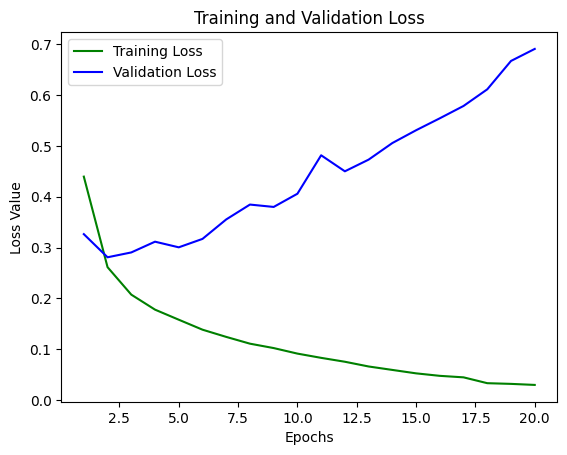

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history

# Extract loss values
loss_values = history_dict['loss']  # Training loss
val_loss_values = history_dict['val_loss']  # Validation loss
# Get the number of epochs
epochs = range(1, len(loss_values) + 1)
# Plot training and validation loss
plt.plot(epochs, loss_values, 'g', label="Training Loss")  # Green line for training loss
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")  # Blue line for validation loss
# Formatting the plot
plt.title('Training and Validation Loss')  # Title of the plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Loss Value')  # Y-axis label
plt.legend()  # Show legend (Training Loss, Validation Loss)
# Display the plot
plt.show()

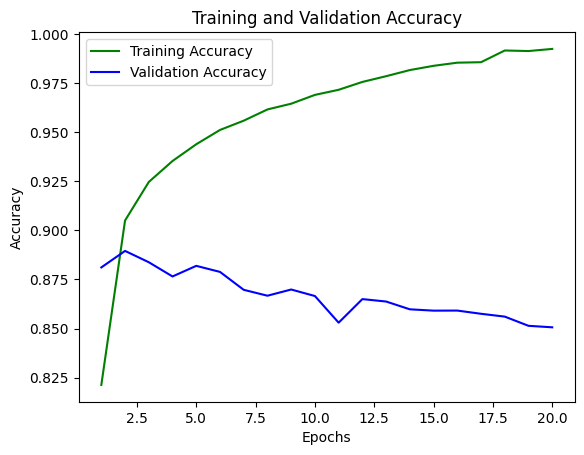

In [ ]:
# Extract accuracy values
acc_values = history_dict['binary_accuracy']  # Training accuracy
val_acc_values = history_dict['val_binary_accuracy']  # Validation accuracy

# Get the number of epochs
epochs = range(1, len(acc_values) + 1)

# Plot training and validation accuracy
plt.plot(epochs, acc_values, 'g', label="Training Accuracy")  # Green line for training accuracy
plt.plot(epochs, val_acc_values, 'b', label="Validation Accuracy")  # Blue line for validation accuracy

# Formatting the plot
plt.title('Training and Validation Accuracy')  # Title of the plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.legend()  # Show legend (Training Accuracy, Validation Accuracy)

# Display the plot
plt.show()

In [ ]:
output = model.evaluate(x_test, y_test)
print(f"Test Loss: {output[0]:.4f}, Test Accuracy: {output[1]:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.8512 - loss: 0.6882
Test Loss: 0.6907, Test Accuracy: 0.8506


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_probs = model.predict(x_test)   # Get predicted probabilities
y_pred = (y_pred_probs > 0.5).astype("int32")   # Convert probabilities to 0/1

cm = confusion_matrix(y_test, y_pred)
print(cm)

#[[TN  FP]
 #[FN  TP]]

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[[11099  1401]
 [ 2333 10167]]
